# Recession Indicators
Brian Howard
21 April 2019

In [145]:
library(UsingR)
library(quantmod)
library(ggplot2)
library(grid)
library(gridExtra)
library(knitr)
library(kableExtra)
library(tools)
library(zoo)
library(signal)
library(stringr)
library(corrplot)
library(Hmisc)
library(tseries)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(Quandl)
library(nnet)
#library(devtools)
#install_github("andrewuhl/RollingWindow")
library(RollingWindow)
library(gtable)
library(data.table)
library(readxl)
library(IRdisplay)

Call helper functions

In [146]:
source("plotHelperPort.r")

Define the source of the data (local or web) and whether to update the models.

In [147]:
bDownload = TRUE
iRetPd <- 180

Define the starting date

In [148]:
string.analysis.start <- "2007-05-22"

These functions help organize tables in the document

In [149]:
tblPort <- function(rrData, datay){
  
  df.port <- rrData[[1]][c("string.symbol", "string.description", "date.series.start", "float.expense.ratio",
                      datay, paste(datay, "_Opt", sep = ""))]
  
  string.colnames <- colnames(df.port);
  string.colnames[1] <- "Symbol"
  string.colnames[2] <- "Description"
  string.colnames[3] <- "Series Start"
  string.colnames[4] <- "Expense Ratio (%)"

  kable(rrData[[1]][c("string.symbol", "string.description", "date.series.start", "float.expense.ratio",
                      datay, paste(datay, "_Opt", sep = ""))], digits=c(0,0,3,3,3,3)) %>%
  kable_styling(bootstrap_options = c("striped", "hover"))
  
}

# Introduction
This is a portfolio analysis, data pulled from yahoo. I’m trying to decide what a better mix would be for this old IRA account. These next few segments load the data into the R program.

## Define the symbols to be used in the analysis.

This code defines stock ticker symbols that will be available for analysis. It includes descriptions and labels for the plots.

The table uses the analysis start date as the series start date to instantiate the data frame. Once the data is pulled down into the zoo object the actual series start data will replace the analyis start.

In [150]:
string.symbol <- "VTWO"
string.source <- "yahoo"
string.description <- "Vanguard Russell 2000 ETF"
string.label.y = "Dollars"
float.expense.ratio <- 0.15
date.series.start <- as.Date(string.analysis.start)
df.symbols = data.frame(
  string.symbol,
  string.source,
  string.description,
  string.label.y,
  float.expense.ratio,
  date.series.start,
  stringsAsFactors = FALSE
)

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "EES",
      string.source = "yahoo",
      string.description = "WisdomTree US SmallCap Earnings ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.38,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "IJR",
      string.source = "yahoo",
      string.description = "iShares Core S&P Small-Cap ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.05,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "VGSTX",
      string.source = "yahoo",
      string.description = "Vanguard STAR Inv",
      string.label.y = "Dollars",
      float.expense.ratio = 0.32,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "VFINX",
      string.source = "yahoo",
      string.description = "Vanguard 500 Index Investor",
      string.label.y = "Dollars",
      float.expense.ratio = 0.14,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "VOE",
      string.source = "yahoo",
      string.description = "Vanguard Mid-Cap Value ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.07,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "VOT",
      string.source = "yahoo",
      string.description = "Vanguard Mid-Cap Growth ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.07,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "TMFGX",
      string.source = "yahoo",
      string.description = "Motley Fool Great America Investor",
      string.label.y = "Dollars",
      float.expense.ratio = 1.16,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "IWM",
      string.source = "yahoo",
      string.description = "iShares Russell 2000",
      string.label.y = "Dollars",
      float.expense.ratio = 0.19,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "QQQ",
      string.source = "yahoo",
      string.description = "PowerShares QQQ ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.20,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "ONEQ",
      string.source = "yahoo",
      string.description = "Fidelity NASDAQ Composite Index Tracking Stock Fund",
      string.label.y = "Dollars",
      float.expense.ratio = 0.21,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "HAINX",
      string.source = "yahoo",
      string.description = "Harbor International Institutional",
      string.label.y = "Dollars",
      float.expense.ratio = 0.81,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "VEU",
      string.source = "yahoo",
      string.description = "Vanguard FTSE All-Wld ex-US ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.11,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "BIL",
      string.source = "yahoo",
      string.description = "SPDR Blmbg Barclays 1-3 Mth T-Bill ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.14,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "IVOO",
      string.source = "yahoo",
      string.description = "Vanguard S&P Mid-Cap 400 ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.15,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "MDY",
      string.source = "yahoo",
      string.description = "SPDR S&P MidCap 400 ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.24,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "VO",
      string.source = "yahoo",
      string.description = "Vanguard Mid-Cap ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.05,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "CZA",
      string.source = "yahoo",
      string.description = "Invesco Zacks Mid-Cap ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.15,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "VYM",
      string.source = "yahoo",
      string.description = "Vanguard High Dividend Yield ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.08,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "^GSPC",
      string.source = "yahoo",
      string.description = "S&P 500",
      string.label.y = "Dollars",
      float.expense.ratio = 0.00,
      date.series.start = as.Date(string.analysis.start)
    )
  )

df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "ACWI",
      string.source = "yahoo",
      string.description = "iShares MSCI ACWI ETF",
      string.label.y = "Dollars",
      float.expense.ratio = 0.32,
      date.series.start = as.Date(string.analysis.start)
    )
  )

## Build the data frame

This code loops through the df.symbols dataframe and pulls down the symbols. The getSymbols function returns zoo objects, this snippet converts it into a dataframe, which simplifies operations in R.

In [151]:


if (bDownload) {
  # Get the data
  for (idx in 1:nrow(df.symbols)) {
    # Get the string. The actual string is used to download data. The actual
    # symbol string (i.e. ^GSPC) can contain characters that cannot be used
    # in variable names in R so we also create a safe string to allow us to
    # look up the XTS objects
    string.symbol <- df.symbols[idx, "string.symbol"]
    string.symbol.safe <-
      str_replace_all(string.symbol, "[^[:alnum:]]", "")
    
    # Call the QuantMod function
    getSymbols(
      as.character(string.symbol),
      src = as.character(df.symbols[idx, "string.source"]),
      auto.assign = TRUE,
      from = as.Date("1900-01-01"),
      to = Sys.Date()
    )
    
    # Update the symbol data frame with the actual series start date
    df.symbols[idx, "date.series.start"] <-
      as.Date(index(get(string.symbol.safe)[1]))
    
  }
  
  # This snippet is needed because some of the ticker symbols include are invalid variable names
  df.symbols$string.symbol <-
    str_replace_all(df.symbols$string.symbol, "[^[:alnum:]]", "")
  
  # Build the xts array, to be converted to a data frame
  xtsData <- get(df.symbols$string.symbol[1])
  for (idx in 2:nrow(df.symbols)) {
    xtsData <- merge(xtsData,  get(df.symbols$string.symbol[idx]))
  }
  
  dfData <- data.frame(xtsData)
  
  # These two lines evenly space all the data at a daily interval
  zooData <- zoo(dfData, as.Date(rownames(dfData)))
  zooData <-
    merge.zoo(zooData, zoo(, seq(start(zooData), end(zooData), by = 1)), all =
                TRUE)
  dfData <- data.frame(zooData)
  
  # Save it off
  save(dfData, file = "dfData.Rda")
  
} else{
  load("dfData.Rda")
}

Warning message:
"TMFGX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."

## Interpolate data

The data is interpolated to a daily basis. This is done because I also incorporate other data sampled at different intervals. When performing correlations, it is easier if all the data has the same time basis.


In [152]:
for (col_name in names(dfData))
{
    if (is.numeric(dfData[,col_name]))
    {
      dfData[,col_name] <- na.approx(dfData[,col_name], rule=2)
      
    }
}



## Add date column
This speeds some of the upcoming operations

In [153]:
dfData$date = as.Date(rownames(dfData))

## Normalize data
Linearly interpolate the data, add normalized columns (this helps speed portfolio calcs)

In [154]:
for (col_name in names(dfData))
{
    if (is.numeric(dfData[,col_name]))
    {
      # Normalize data
      strColNorm <- paste(col_name, "_Norm", sep="") 
      dfData[, strColNorm] <- dfData[,col_name] / dfData[dfData$date==as.Date(string.analysis.start),col_name]

    }
}


## Truncate data

A few last calculations to truncate and aggregrate the data

In [155]:
dfData <- with(dfData, dfData[date>=string.analysis.start,])

# Calculate the returns

## Calculate the time based returns on annual basis

In this analysis all the returns are calculated on an annual basis. It means there is a year of dead data, but it eliminates seasonal variation in data (think: Christmas).

In [156]:
for (strName in names(dfData)) {
  if (is.numeric(dfData[, strName])) {
    # The portfolio analysis relies heavily on this one
    strNameYoY <- paste(strName, "_YoY", sep = "")
    dfData[strNameYoY] <- CalcYoY(dfData, strName, iRetPd)
    
    #strNameLog <- paste(strName, "_LogRet", sep="")
    #dfData[strNameLog] <- CalcLogRet(dfData, strName, iRetPd)
    
    strRootSym <- strName
    strSuffix <- ""
    if (grepl("\\.", strName)) {
      strRootSym <-  substr(strName, 1, regexpr("\\.", strName) - 1)
      strSuffix <-
        substr(strName, regexpr("\\.", strName) + 1, nchar(strName))
      strSuffix <- paste(" (", strSuffix, ")", sep = "")
    }
    
    # Get the description, start date, and expense ratio from the original series
    strNewDesc <-
      df.symbols[grep(paste("^", strRootSym, "$", sep = ""),
                      df.symbols$string.symbol), ]$string.description
    date.temp <-
      df.symbols[grep(paste("^", strRootSym, "$", sep = ""),
                      df.symbols$string.symbol), ]$date.series.start
    float.temp <-
      df.symbols[grep(paste("^", strRootSym, "$", sep = ""),
                      df.symbols$string.symbol), ]$float.expense.ratio
    
    # Add the year over year to the symbols data frame
    df.symbols <-
      rbind(
        df.symbols,
        data.frame(
          string.symbol = strNameYoY,
          string.source = "Calc",
          string.description = paste(strNewDesc, strSuffix, " Year over Year", sep =
                                       ""),
          string.label.y = "Percent",
          float.expense.ratio = float.temp,
          date.series.start = date.temp
        )
      )
    
  }
  
}

## Summarize returns

In constructing the portfolio it is importance to understand the blend of funds. We want maximum returns for minimum volatility. That's not c

In [157]:
# Linearly interpolate the data, add normalized columns (this helps speed portfolio calcs)

for (col_name in names(dfData))
{
    if (is.numeric(dfData[,col_name]))
    {

      # Split the name ("USGFG.Close"" is "USGFG"" and "Close"")
      lstSyms <- lstSymSplit(col_name)
        
      # Only if there is two terms
      if( length(lstSyms) > 1){

        if( lstSyms[2] == 'Close_YoY' ){

          # Return is the mean of the series
          df.symbols[df.symbols$string.symbol==lstSyms[1],'ExpReturn'] <- mean(dfData[, col_name])

          # Volatility is the standard deviation of the series.
          df.symbols[df.symbols$string.symbol==lstSyms[1],'Volatility'] <- sd(dfData[, col_name])
          
        }
      }

    }
}

# Define the various portfolios

This code is evaluating ROTH account portfolios. IVOO has a lower expense ratio than MDY, but performance is similar and MDY has a history that goes back to 1995 so I am using MDY as a substitute fo IVOO.

In [158]:

df.symbols$pf_Roth_Legacy <- 0
df.symbols[df.symbols$string.symbol=='VTWO',]$pf_Roth_Legacy <-  0.0947
df.symbols[df.symbols$string.symbol=='VFINX',]$pf_Roth_Legacy <-  0.5051
df.symbols[df.symbols$string.symbol=='TMFGX',]$pf_Roth_Legacy <-  0.2568
df.symbols[df.symbols$string.symbol=='IWM',]$pf_Roth_Legacy <-  0.0001
df.symbols[df.symbols$string.symbol=='QQQ',]$pf_Roth_Legacy <-  0.0001
df.symbols[df.symbols$string.symbol=='HAINX',]$pf_Roth_Legacy <-  0.0001
df.symbols[df.symbols$string.symbol=='VEU',]$pf_Roth_Legacy <-  0.0001


df.symbols$pf_Roth_New <- 0
df.symbols[df.symbols$string.symbol=='VTWO',]$pf_Roth_New <-  0.0000
df.symbols[df.symbols$string.symbol=='EES',]$pf_Roth_New <-  0.0000
df.symbols[df.symbols$string.symbol=='IJR',]$pf_Roth_New <-  0.0890
df.symbols[df.symbols$string.symbol=='VFINX',]$pf_Roth_New <-  0.2680
df.symbols[df.symbols$string.symbol=='VOE',]$pf_Roth_New <-  0.0000
df.symbols[df.symbols$string.symbol=='VOT',]$pf_Roth_New <-  0.0450
df.symbols[df.symbols$string.symbol=='VEU',]$pf_Roth_New <-  0.0000
df.symbols[df.symbols$string.symbol=='IWM',]$pf_Roth_New <-  0.0000
df.symbols[df.symbols$string.symbol=='QQQ',]$pf_Roth_New <-  0.3130
df.symbols[df.symbols$string.symbol=='ONEQ',]$pf_Roth_New <-  0.0001
df.symbols[df.symbols$string.symbol=='IVOO',]$pf_Roth_New <-  0.0000
df.symbols[df.symbols$string.symbol=='MDY',]$pf_Roth_New <-  0.0890
df.symbols[df.symbols$string.symbol=='VO',]$pf_Roth_New <-  0.0000
df.symbols[df.symbols$string.symbol=='CZA',]$pf_Roth_New <-  0.0000
df.symbols[df.symbols$string.symbol=='BIL',]$pf_Roth_New <-  0.1500
df.symbols[df.symbols$string.symbol=='VYM',]$pf_Roth_New <-  0.0450
df.symbols[df.symbols$string.symbol=='ACWI',]$pf_Roth_New <-  0.0001
df.symbols[df.symbols$string.symbol=='VEU',]$pf_Roth_Legacy <-  0.0001


# This part normalizes all the data, in case there is a typo or 
# numerical rounding that results in somthing less than 100%
for (col_name in names(df.symbols)){
  
  if( length(grep('pf_', col_name))){
    df.symbols[,col_name] <- df.symbols[,col_name] / sum(df.symbols[,col_name])
  }
  
}

# Update the returns
dfData <- pfUpdateReturn("pf_Roth_Legacy", dfData, df.symbols)
dfData <- pfUpdateReturn("pf_Roth_New", dfData, df.symbols)


Display the two portfolios. A great resource for kable formatting: https://haozhu233.github.io/kableExtra/awesome_table_in_html.html

In [159]:
string.colnames <- colnames(df.symbols);
string.colnames[1] <- "Symbol"
string.colnames[2] <- "Source"
string.colnames[3] <- "Description"
string.colnames[4] <- "Label"
string.colnames[5] <- "Expense Ratio (%)"
string.colnames[6] <- "Series Start"
string.colnames[7] <- "Expected Return"
kable(df.symbols[(df.symbols$pf_Roth_Legacy > 0.0) |
                   (df.symbols$pf_Roth_New > 0.0), ],
      col.names = string.colnames,
      digits = c(0, 0, 0, 0, 2, 0, 2, 2, 3, 3)) %>%
  kable_styling(bootstrap_options = c("striped", "hover")) %>%
  as.character() %>%
  display_html()

,Symbol,Source,Description,Label,Expense Ratio (%),Series Start,Expected Return,Volatility,pf_Roth_Legacy,pf_Roth_New
1,VTWO,yahoo,Vanguard Russell 2000 ETF,Dollars,0.15,2010-09-22,0.03,0.09,0.111,0.000
3,IJR,yahoo,iShares Core S&P Small-Cap ETF,Dollars,0.05,2000-05-26,0.02,0.16,0.000,0.089
5,VFINX,yahoo,Vanguard 500 Index Investor,Dollars,0.14,1980-01-02,0.02,0.14,0.589,0.268
7,VOT,yahoo,Vanguard Mid-Cap Growth ETF,Dollars,0.07,2006-08-25,0.02,0.19,0.000,0.045
8,TMFGX,yahoo,Motley Fool Great America Investor,Dollars,1.16,2010-11-02,0.03,0.08,0.300,0.000
9,IWM,yahoo,iShares Russell 2000,Dollars,0.19,2000-05-26,0.01,0.17,0.000,0.000
10,QQQ,yahoo,PowerShares QQQ ETF,Dollars,0.20,1999-03-10,0.04,0.15,0.000,0.313
11,ONEQ,yahoo,Fidelity NASDAQ Composite Index Tracking Stock Fund,Dollars,0.21,2003-10-01,0.03,0.15,0.000,0.000
12,HAINX,yahoo,Harbor International Institutional,Dollars,0.81,1987-12-29,-0.04,0.23,0.000,0.000
13,VEU,yahoo,Vanguard FTSE All-Wld ex-US ETF,Dollars,0.11,2007-03-08,-0.02,0.19,0.000,0.000


# Legacy Roth Portfolio

## Time series analysis

This one is performing much worse than I expected. Data in this section is for reference only.

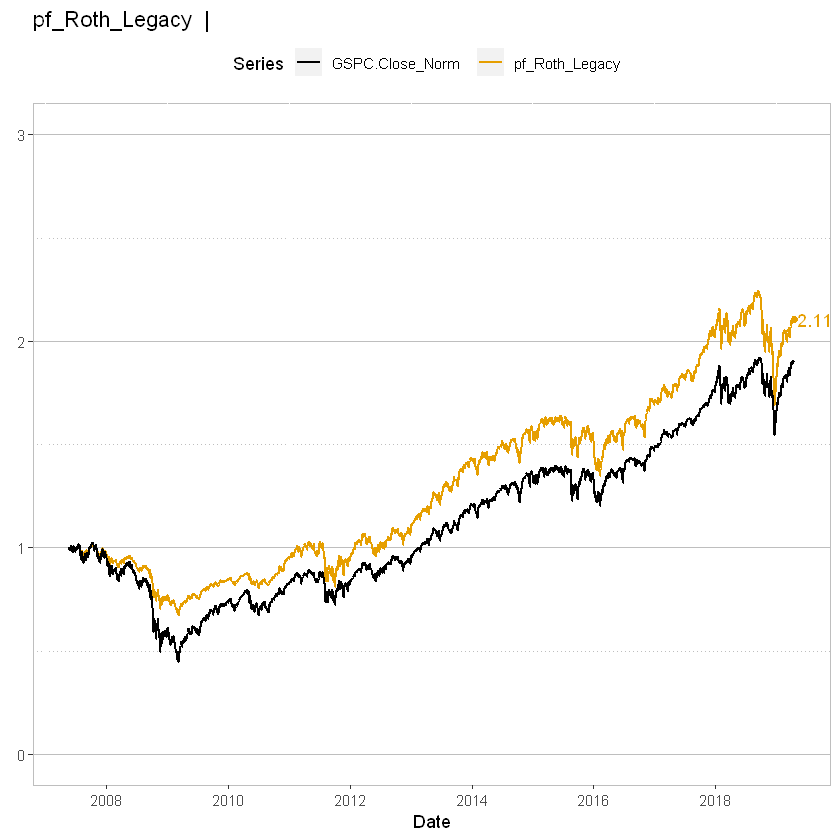

In [160]:
datay.legacy <- "pf_Roth_Legacy"
ylim <- c(0, 3)
plotSingleBench(datay.legacy, ylim, df.symbols, dfData, string.analysis.start)

## Risk return analysis

This section plots the funds on return and volatility axis. An ideal fund would be in the upper left corner of the plot.

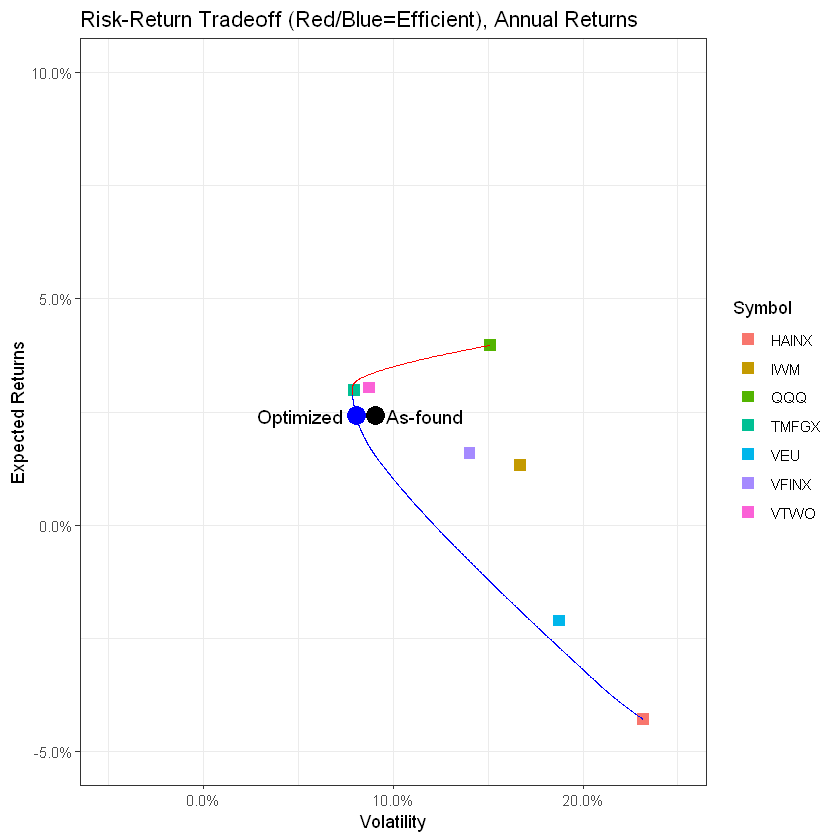

In [165]:
rrData <- plotReturnVolatility(datay.legacy, dfData, df.symbols)
rrData[[2]]

This table shows the portfolio. Column `r datay.legacy` shows the inputted portfolio and `r paste(datay.legacy,"_Opt", sep="")` shows the portfolio with the same returns, but less risk.

In [167]:
tblPort(rrData, datay.legacy)  %>%
  as.character() %>%
  display_html()

,string.symbol,string.description,date.series.start,float.expense.ratio,pf_Roth_Legacy,pf_Roth_Legacy_Opt
1,VTWO,Vanguard Russell 2000 ETF,2010-09-22,0.15,0.111,0.000
5,VFINX,Vanguard 500 Index Investor,1980-01-02,0.14,0.589,0.000
8,TMFGX,Motley Fool Great America Investor,2010-11-02,1.16,0.300,0.891
9,IWM,iShares Russell 2000,2000-05-26,0.19,0.000,0.000
10,QQQ,PowerShares QQQ ETF,1999-03-10,0.20,0.000,0.000
12,HAINX,Harbor International Institutional,1987-12-29,0.81,0.000,0.000
13,VEU,Vanguard FTSE All-Wld ex-US ETF,2007-03-08,0.11,0.000,0.109
